# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1. Read Dataset

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Right off the bat I can see plenty of missing value. It means we need to do some data prep/cleaning before we even proceed to predicting anything. I will drop the columns if it has more than 33% missing values. This allows me to have at least 2/3 of the dataset to work with.

In [7]:
threshold = 0.33
missing_percentage = df.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df = df.drop(columns=columns_to_drop)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,NaN,Other Metro Cities,No,No,SMS Sent


In [8]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# 2. Visualise & Analyse

Now that I have elimninated columns with 33% missing values, lets inspect the rest to eliminate more "un-useful" columns.

In [10]:
for column in df.columns:
    value_counts = df[column].value_counts()
    total_entries = len(df)
    
    # Calculate the percentage of the most common value
    most_common_count = value_counts.iloc[0]
    percentage_most_common = (most_common_count / total_entries) * 100
    
    print(f"Column: {column}")
    print(f"Most common value: {value_counts.index[0]}")
    print(f"Frequency of most common value: {most_common_count}")
    print(f"Percentage of most common value: {percentage_most_common:.2f}%")
    print("-" * 50)


Column: Prospect ID
Most common value: 748655b6-62bc-4394-88a6-89e92df75bdd
Frequency of most common value: 1
Percentage of most common value: 0.01%
--------------------------------------------------
Column: Lead Number
Most common value: 655360
Frequency of most common value: 1
Percentage of most common value: 0.01%
--------------------------------------------------
Column: Lead Origin
Most common value: Landing Page Submission
Frequency of most common value: 4886
Percentage of most common value: 52.88%
--------------------------------------------------
Column: Lead Source
Most common value: Google
Frequency of most common value: 2868
Percentage of most common value: 31.04%
--------------------------------------------------
Column: Do Not Email
Most common value: No
Frequency of most common value: 8506
Percentage of most common value: 92.06%
--------------------------------------------------
Column: Do Not Call
Most common value: No
Frequency of most common value: 9238
Percentage of m

From the above, I see that for some columns, the percentage of occurance of the highest value is very very high. For example, the column Do Not Call have 99% of respondants saying "No". We can therefire drop these columns.

In [11]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','Last Activity',  'Page Views Per Visit', 'Country',
             'What matters most to you in choosing a course','Prospect ID', 'Lead Number',
            'What is your current occupation', 'Lead Origin', 'Lead Source',
            'Do Not Email', 'A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1, inplace = True)

In [12]:
df

,Converted,TotalVisits,Total Time Spent on Website,Specialization,How did you hear about X Education,Lead Profile,City
0,0,0.0,0,Select,Select,Select,Select
1,0,5.0,674,Select,Select,Select,Select
2,1,2.0,1532,Business Administration,Select,Potential Lead,Mumbai
3,0,1.0,305,Media and Advertising,Word Of Mouth,Select,Mumbai
4,1,2.0,1428,Select,Other,Select,Mumbai
...,...,...,...,...,...,...,...
9235,1,8.0,1845,IT Projects Management,Select,Potential Lead,Mumbai
9236,0,2.0,238,Media and Advertising,Select,Potential Lead,Mumbai
9237,0,2.0,199,Business Administration,Select,Potential Lead,Mumbai
9238,1,3.0,499,Human Resource Management,Online Search,NaN,Other Metro Cities


I noticed a few weird values. Eg: I noticed that the columns "City" and "Lead Profile" have values such as "Select". This seems weird as it does not provide useful information. Lets inspect further.

In [13]:
search_word = "Select"

column_counts = {}


for column in df.columns:
    if df[column].dtype == 'object':
        count = df[column].str.lower().str.count(search_word.lower()).sum()
        if count > 0:
            column_counts[column] = count

# Print columns with the search word and their counts
for column, count in column_counts.items():
    print(f"{column}, No. of times: {count}")

Specialization, No. of times: 1942.0
How did you hear about X Education, No. of times: 5043.0
Lead Profile, No. of times: 4146.0
City, No. of times: 2249.0


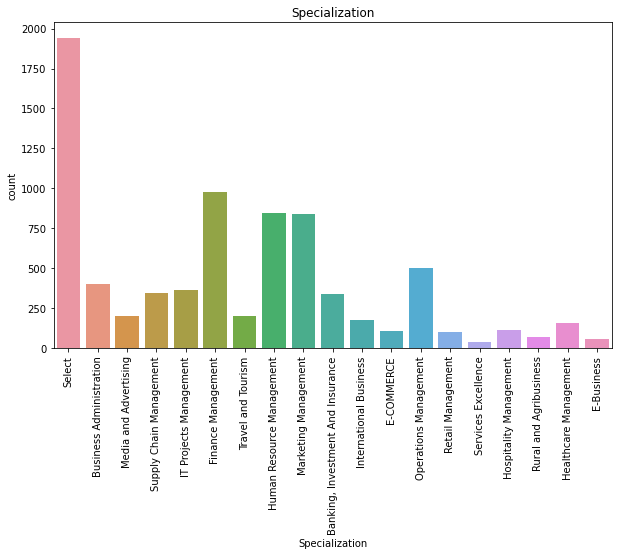

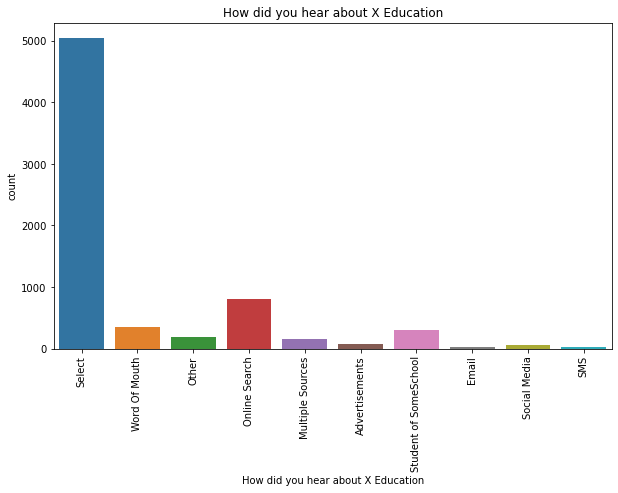

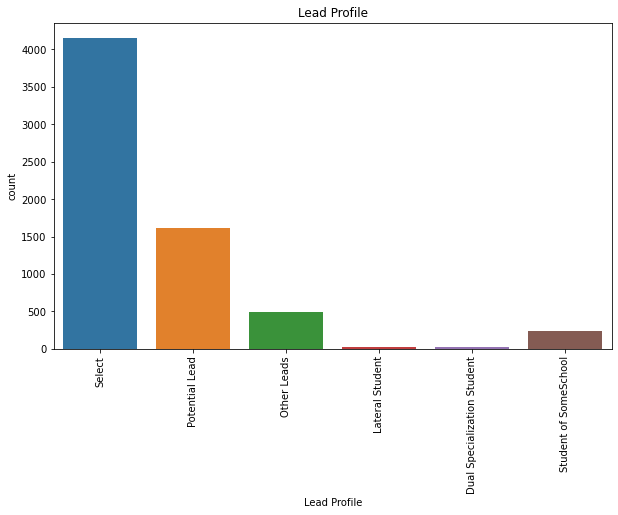

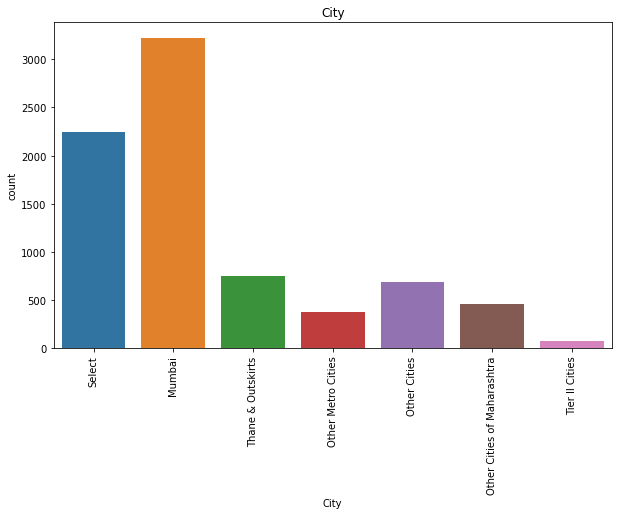

In [14]:
columns_to_visualize = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.show()

# 3. Data Prep

Instead of removing the columns, I shall instead remove the rows as the rest of the values may still prove useful.

In [15]:
search_word = "Select"
columns_to_check = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

# Use boolean indexing to filter the DataFrame
condition = df[columns_to_check].apply(lambda x: x.str.lower().str.contains(search_word.lower())).any(axis=1)

# Use the boolean mask to filter the DataFrame
df = df[~condition]

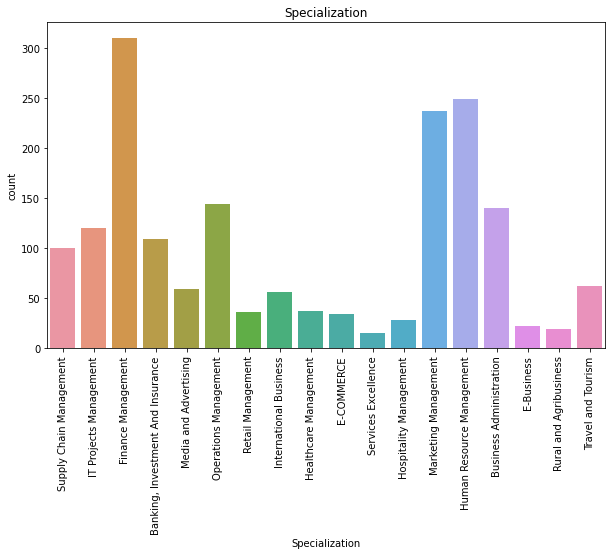

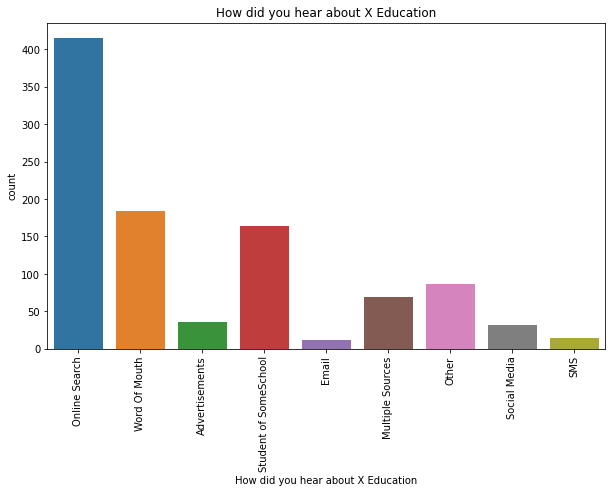

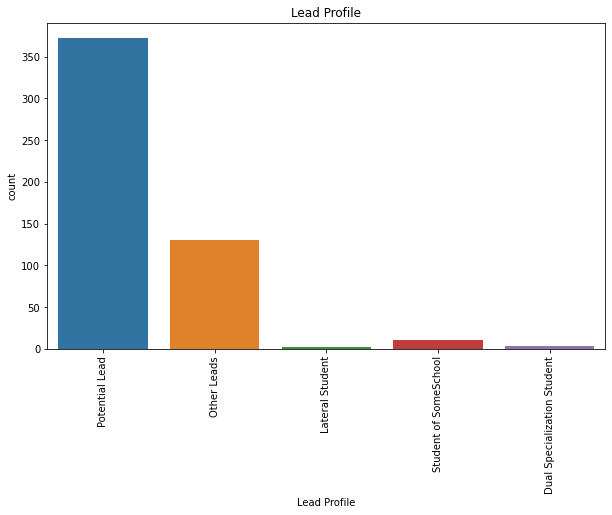

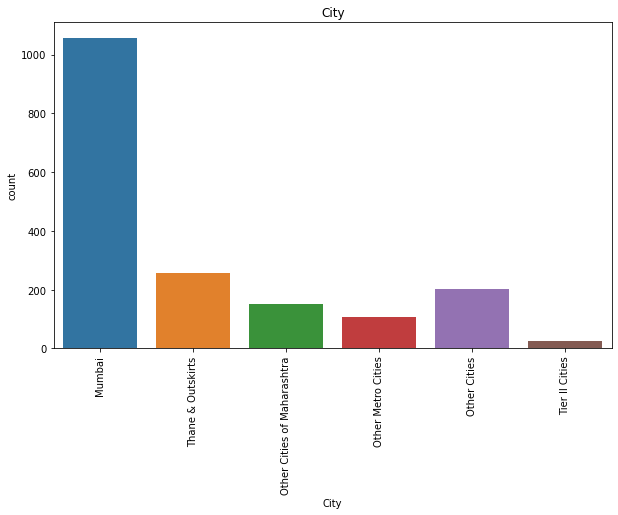

In [16]:
columns_to_visualize = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.show()

Seems like its much better now. However, looking at the values, I noticed that the columns "city" and "Lead Profile" are not sueful. City essentially tells me if the City is Mumbai or not. The rest of the values are very vague (other cities) and I'm not really able to use them. Same thing for Lead Profile. A vast amount of them are classified as Potential lead with very little of the other values.

In [17]:
df.drop(['Lead Profile', 'City'], axis = 1, inplace = True)

In [18]:
df

,Converted,TotalVisits,Total Time Spent on Website,Specialization,How did you hear about X Education
5,0,0.0,0,NaN,NaN
6,1,2.0,1640,Supply Chain Management,Online Search
7,0,0.0,0,NaN,NaN
8,0,2.0,71,IT Projects Management,NaN
9,0,4.0,58,Finance Management,Word Of Mouth
...,...,...,...,...,...
9224,0,4.0,455,Operations Management,Advertisements
9227,1,5.0,1283,Supply Chain Management,Online Search
9230,0,2.0,870,Human Resource Management,Online Search
9231,1,8.0,1016,"Banking, Investment And Insurance",Online Search


In [19]:
df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Specialization', 'How did you hear about X Education'],
      dtype='object')

In [20]:
# Check for object type
type_check = df.loc[:, df.dtypes == 'object']
type_check.columns

Index(['Specialization', 'How did you hear about X Education'], dtype='object')

In [21]:
# Time for dummy creation otherwise we cannot run the ML algo.
dummy = pd.get_dummies(df[['Specialization', 'How did you hear about X Education']], drop_first=True)

# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [22]:
df = df.drop(['Specialization', 'How did you hear about X Education'], 1)

In [23]:
df

,Converted,TotalVisits,Total Time Spent on Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
5,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,2.0,1640,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
7,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,2.0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,4.0,58,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224,0,4.0,455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9227,1,5.0,1283,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
9230,0,2.0,870,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9231,1,8.0,1016,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# 4. Train Test Split & Feature Scailing

In [24]:
X = df.drop(['Converted'], 1)
y = df['Converted']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [26]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
563,0.007092,0.286124,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4534,0.028369,0.455502,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9059,0.042553,0.170335,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6804,0.021277,0.025837,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5479,0.078014,0.529665,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


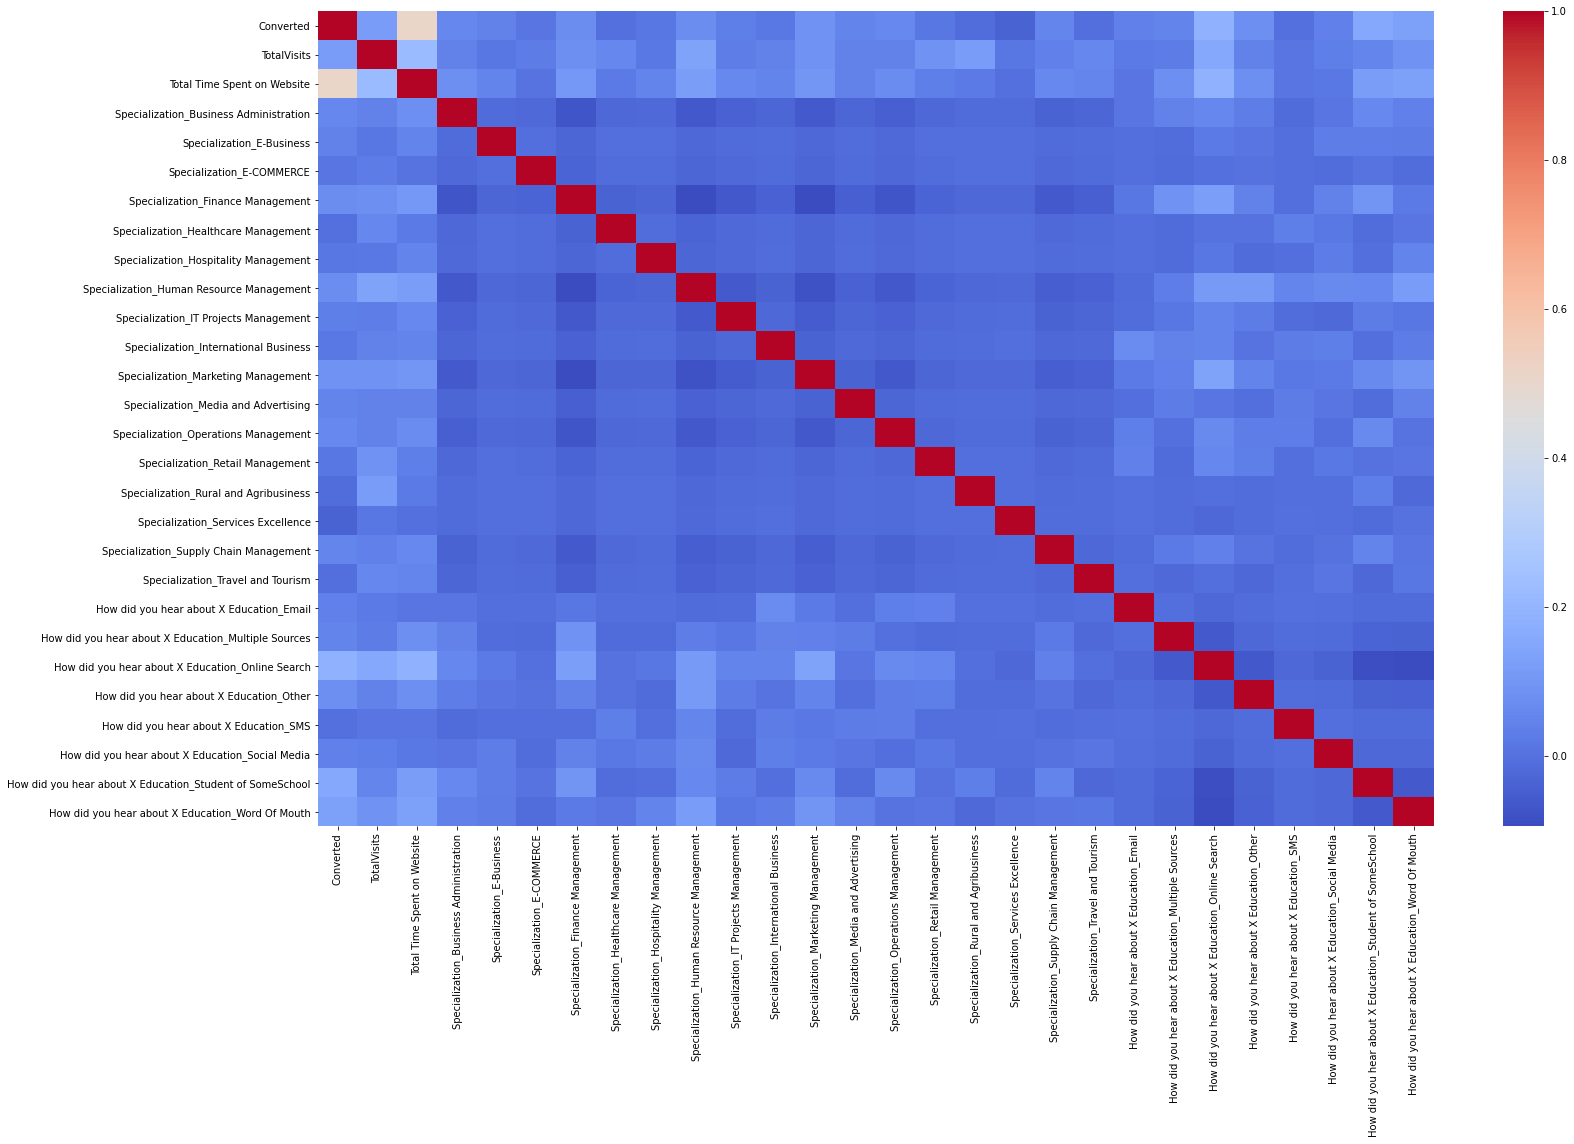

In [27]:
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

# 5. Build Model

In [28]:
logreg = LogisticRegression()

In [29]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Initialize RFE and fit to the scaled data
logreg = LogisticRegression()  # Example classifier
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train_scaled, y_train)


In [30]:
# Lets take a look at the result
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Specialization_Business Administration', False, 12),
 ('Specialization_E-Business', False, 9),
 ('Specialization_E-COMMERCE', False, 4),
 ('Specialization_Finance Management', False, 2),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 5),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', False, 13),
 ('Specialization_International Business', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertising', False, 8),
 ('Specialization_Operations Management', False, 7),
 ('Specialization_Retail Management', False, 3),
 ('Specialization_Rural and Agribusiness', True, 1),
 ('Specialization_Services Excellence', True, 1),
 ('Specialization_Supply Chain Management', False, 11),
 ('Specialization_Travel and Tourism', True, 1),
 ('How did you hear about X Education_Email', True, 1)

In [31]:
# Now that we know which variables have been selected, we can start building our model
col = X_train.columns[rfe.support_]
X_train = X_train[col]

# 1st Model

In [32]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2250
Model:                            GLM   Df Residuals:                     2234
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -864.10
Date:                Sun, 15 Oct 2023   Deviance:                       1728.2
Time:                        18:57:55   Pearson chi2:                 2.27e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -2.8261      0.109    -26.018      0.000      -3.039      -2.613
Total Time Spent on Website                                  4.5614      0.244     18.723      0.000       4.084       5.039
Specialization_Healthcare Management                        -0.7117      0.607     -1.171      0.241      -1.902       0.479
Specialization_Human Resource Management                    -0.4326      0.227     -1.907      0.056      -0.877       0.012
Specialization_International Business                       -0.8112      0.492     -1.649      0.099      -1.775       0.153
Specialization_Marketing Management                         -0.1662      0.218     -0.763      0.445      -0.593       0.261
Specialization_Rural and Agribusiness                       -1.5714      0.927     -1.695      0.090      -3.388       0.245
Specialization_Services Excellence                         -21.0764   1.23e+04     -0.002      0.999   -2.41e+04     2.4e+04
Specialization_Travel and Tourism                           -0.8660      0.478     -1.812      0.070      -1.803       0.071
How did you hear about X Education_Email                     1.9163      0.792      2.419      0.016       0.364       3.469
How did you hear about X Education_Multiple Sources          0.4575      0.379      1.208      0.227      -0.285       1.200
How did you hear about X Education_Online Search             1.0985      0.171      6.417      0.000       0.763       1.434
How did you hear about X Education_Other                     1.3052      0.312      4.182      0.000       0.693       1.917
How did you hear about X Education_Social Media              1.6316      0.474      3.444      0.001       0.703       2.560
How did you hear about X Education_Student of SomeSchool     1.4611      0.241      6.056      0.000       0.988       1.934
How did you hear about X Education_Word Of Mouth             1.2547      0.225      5.570      0.000       0.813       1.696
============================================================================================================================
"""

In [33]:
X_train.drop('Specialization_Services Excellence', axis = 1, inplace = True)

# 2nd Model

In [34]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2250
Model:                            GLM   Df Residuals:                     2235
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -866.93
Date:                Sun, 15 Oct 2023   Deviance:                       1733.9
Time:                        18:57:55   Pearson chi2:                 2.29e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -2.8385      0.109    -26.111      0.000      -3.052      -2.625
Total Time Spent on Website                                  4.5533      0.243     18.719      0.000       4.077       5.030
Specialization_Healthcare Management                        -0.6991      0.607     -1.151      0.250      -1.890       0.491
Specialization_Human Resource Management                    -0.4233      0.227     -1.867      0.062      -0.868       0.021
Specialization_International Business                       -0.8032      0.492     -1.634      0.102      -1.767       0.160
Specialization_Marketing Management                         -0.1575      0.218     -0.724      0.469      -0.584       0.269
Specialization_Rural and Agribusiness                       -1.5624      0.928     -1.684      0.092      -3.380       0.256
Specialization_Travel and Tourism                           -0.8518      0.478     -1.782      0.075      -1.789       0.085
How did you hear about X Education_Email                     1.9289      0.792      2.436      0.015       0.377       3.481
How did you hear about X Education_Multiple Sources          0.4708      0.378      1.244      0.214      -0.271       1.213
How did you hear about X Education_Online Search             1.1101      0.171      6.489      0.000       0.775       1.445
How did you hear about X Education_Other                     1.3170      0.312      4.222      0.000       0.706       1.928
How did you hear about X Education_Social Media              1.6414      0.474      3.466      0.001       0.713       2.570
How did you hear about X Education_Student of SomeSchool     1.4730      0.241      6.109      0.000       1.000       1.946
How did you hear about X Education_Word Of Mouth             1.2510      0.224      5.578      0.000       0.811       1.691
============================================================================================================================
"""

In [35]:
X_train.drop('Total Time Spent on Website', axis = 1, inplace = True)

# 3rd Model

In [36]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2250
Model:                            GLM   Df Residuals:                     2236
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1072.6
Date:                Sun, 15 Oct 2023   Deviance:                       2145.2
Time:                        18:57:56   Pearson chi2:                 2.26e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -1.8275      0.075    -24.454      0.000      -1.974      -1.681
Specialization_Healthcare Management                        -0.4938      0.588     -0.839      0.401      -1.647       0.660
Specialization_Human Resource Management                    -0.3200      0.202     -1.581      0.114      -0.717       0.077
Specialization_International Business                       -0.5940      0.421     -1.409      0.159      -1.420       0.232
Specialization_Marketing Management                         -0.0401      0.193     -0.207      0.836      -0.419       0.339
Specialization_Rural and Agribusiness                       -0.8218      0.791     -1.039      0.299      -2.372       0.729
Specialization_Travel and Tourism                           -0.2196      0.444     -0.495      0.621      -1.090       0.651
How did you hear about X Education_Email                     1.9054      0.716      2.661      0.008       0.502       3.309
How did you hear about X Education_Multiple Sources          0.9892      0.327      3.024      0.002       0.348       1.630
How did you hear about X Education_Online Search             1.5626      0.149     10.484      0.000       1.270       1.855
How did you hear about X Education_Other                     1.8323      0.276      6.644      0.000       1.292       2.373
How did you hear about X Education_Social Media              1.6538      0.428      3.866      0.000       0.815       2.492
How did you hear about X Education_Student of SomeSchool     1.8891      0.211      8.969      0.000       1.476       2.302
How did you hear about X Education_Word Of Mouth             1.6253      0.194      8.362      0.000       1.244       2.006
============================================================================================================================
"""

In [37]:
# Now we shall take a look at the VIF 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Specialization_Human Resource Management,1.15
3,Specialization_Marketing Management,1.14
12,How did you hear about X Education_Word Of Mouth,1.08
11,How did you hear about X Education_Student of ...,1.04
2,Specialization_International Business,1.03
9,How did you hear about X Education_Other,1.03
7,How did you hear about X Education_Multiple So...,1.02
10,How did you hear about X Education_Social Media,1.02
0,Specialization_Healthcare Management,1.01
5,Specialization_Travel and Tourism,1.01


The VIF seems pretty good to me. We no longer need to drop any vairables. We can now proceed to predicting model

# 6. Model Eval

In [38]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

563     0.138536
4534    0.434148
9059    0.138536
6804    0.104560
5479    0.449610
2928    0.293525
1260    0.138536
5939    0.138536
3184    0.138536
2453    0.356829
dtype: float64

In [39]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13853563, 0.43414824, 0.13853563, 0.10456023, 0.44960998,
       0.29352522, 0.13853563, 0.13853563, 0.13853563, 0.35682933])

In [40]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.138536
1,0,0.434148
2,1,0.138536
3,0,0.104560
4,1,0.449610


In [41]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.138536,0
1,0,0.434148,0
2,1,0.138536,0
3,0,0.104560,0
4,1,0.449610,0


In [42]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1693,   61],
       [ 426,   70]], dtype=int64)

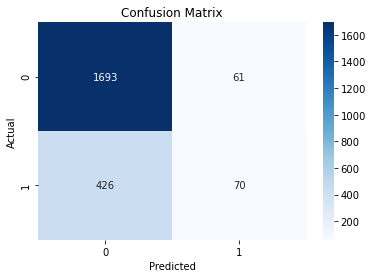

In [43]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [45]:
display(TP/(TP+FN))
display(TN/(TN+FP))

0.14112903225806453

0.9652223489167617

In [46]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

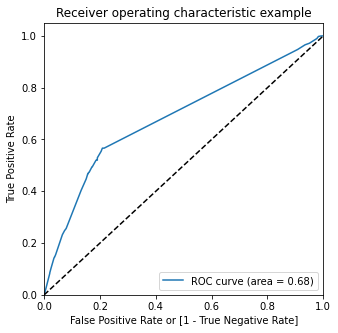

In [47]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Seems like good result to me as 0.70 of the area is under the curve. Still to improve further, lets check optimal cut off

In [48]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.138536,0,1,1,0,0,0,0,0,0,0,0
1,0,0.434148,0,1,1,1,1,1,0,0,0,0,0
2,1,0.138536,0,1,1,0,0,0,0,0,0,0,0
3,0,0.104560,0,1,1,0,0,0,0,0,0,0,0
4,1,0.449610,0,1,1,1,1,1,0,0,0,0,0


In [49]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

num = np.arange(0.0, 1.0, 0.1)
for i in num:
    i = round(i, 2)  # Round the float value to a specific precision
    y_pred = (y_train_pred_final[i] > i).astype(int)
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_pred)
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.220444  1.000000  0.000000
0.1   0.1  0.236000  0.989919  0.022805
0.2   0.2  0.738667  0.566532  0.787343
0.3   0.3  0.742667  0.554435  0.795895
0.4   0.4  0.760889  0.461694  0.845496
0.5   0.5  0.783556  0.141129  0.965222
0.6   0.6  0.779556  0.000000  1.000000
0.7   0.7  0.779556  0.000000  1.000000
0.8   0.8  0.779556  0.000000  1.000000
0.9   0.9  0.779556  0.000000  1.000000


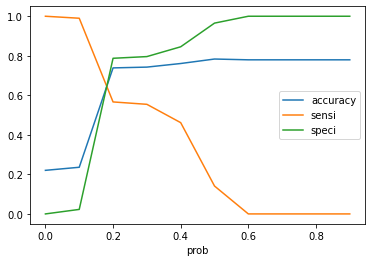

In [50]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above, you can see the the cutoff is 0.2/ Lets run again but with 0.2 as the cut off.

In [51]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.138536,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.434148,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.138536,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.104560,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.449610,0,1,1,1,1,1,0,0,0,0,0,1


In [52]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7386666666666667

In [53]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1381,  373],
       [ 215,  281]], dtype=int64)

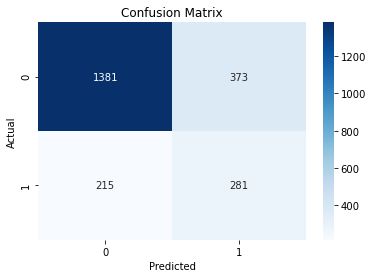

In [54]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [56]:
display(TP/(TP+FN)) # Calculate Sensitivity
display(TN/(TN+FP)) # Calculate Specificity

0.5665322580645161

0.7873432155074116

Seems like a muich better result. Now lets predict with the Test Set

# 7. Test Set

Lets do the same as before but now for test set

In [57]:
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

# Scale the data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_imputed)

# Initialize RFE and fit to the scaled data
logreg = LogisticRegression()  # Example classifier
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_test_scaled, y_test)

In [58]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
4906,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5983,977,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5681,213,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7444,353,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
X_test.drop(['Specialization_Services Excellence','Total Time Spent on Website'], axis = 1, inplace = True)

In [60]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [61]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [62]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [63]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [64]:
y_pred_final.head()

,Converted,0
0,0,0.138536
1,1,0.138536
2,0,0.138536
3,0,0.138536
4,0,0.138536


In [65]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.138536
1,1,0.138536
2,0,0.138536
3,0,0.138536
4,0,0.138536


In [66]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [67]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7440414507772021

In [68]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[576, 161],
       [ 86, 142]], dtype=int64)

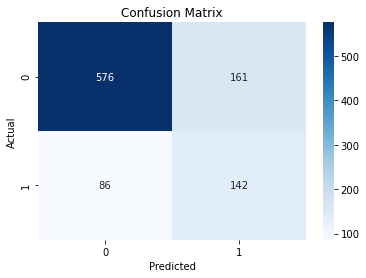

In [69]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [70]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [71]:
display(TP/(TP+FN)) # Calculate Sensitivity
display(TN/(TN+FP)) # Calculate Specificity

0.6228070175438597

0.7815468113975577